## RESEARCH QUESTION 2

To what extent past class failures might have an impact on alcohol consumption in students?

In [2]:
#pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 3.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



from sklearn import set_config
set_config(transform_output = "pandas")

## Function to Save Figures

In [3]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [5]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [6]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [7]:
xt = X_test.drop('avg_grade',axis=1)

In [8]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

In [9]:
dummy.predict(xt)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

### 0r classifier accuray

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## 1 R classifier


def one_r_classifier(X, y, X_test):
    best_feature = None
    best_accuracy = 0
    
    # Iterate over each feature
    for feature in X_train.columns:
        # Count the occurrences of each label for the current feature
        label_counts = X.groupby([feature, y]).size().unstack(fill_value=0)
        
        # Select the label with the maximum count for the current feature
        selected_label = label_counts.idxmax(axis=1)
        
        # Predict the label for the test set
        predictions = X_test[feature].map(selected_label.get).fillna(selected_label.value_counts().idxmax())
        
        # Calculate accuracy
        accuracy = accuracy_score(y, predictions)
        
        # Update the best feature if the accuracy is higher
        if accuracy > best_accuracy:
            best_feature = feature
            best_accuracy = accuracy
    print(best_feature)
    return best_feature



best_feature = one_r_classifier(X, y, X_test)
print("Best feature:", best_feature)



from sklearn_contrib_py_1R import OneRClassifier

# Create the 1R classifier and fit it to the training data
classifier = OneRClassifier()
classifier.fit(X, y)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(X_test['alc'], y_pred)
print("Accuracy:", accuracy)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']] 
y_test = X_test['alc']
X_test = X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]



In [14]:
y_train

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    1.0
891    1.0
Name: alc, Length: 892, dtype: float64

## KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [16]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [17]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
204,1.0,1.0
205,1.0,1.0
206,0.0,1.0
207,0.0,0.0


In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.5789473684210527


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       115
         1.0       0.53      0.55      0.54        94

    accuracy                           0.58       209
   macro avg       0.58      0.58      0.58       209
weighted avg       0.58      0.58      0.58       209



In [22]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,69,46
1,42,52


In [23]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train)))

Train Accuracy  0.6289237668161435


# ROC curve

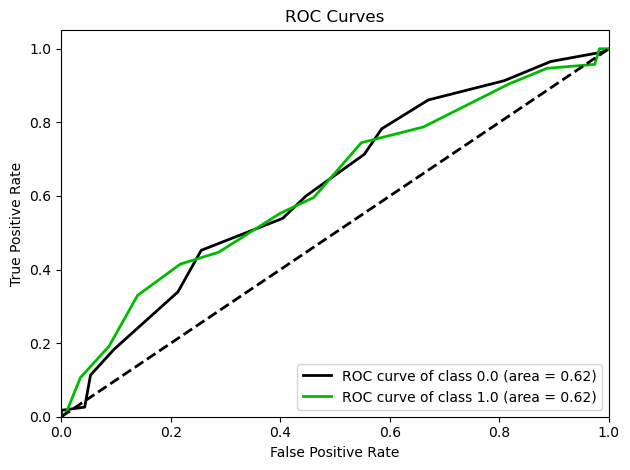

In [24]:
import scikitplot as skplt
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-KNN')
plt.show();

# Experimenting with different values of k

In [31]:
k = range(10, 20)
k

range(10, 20)

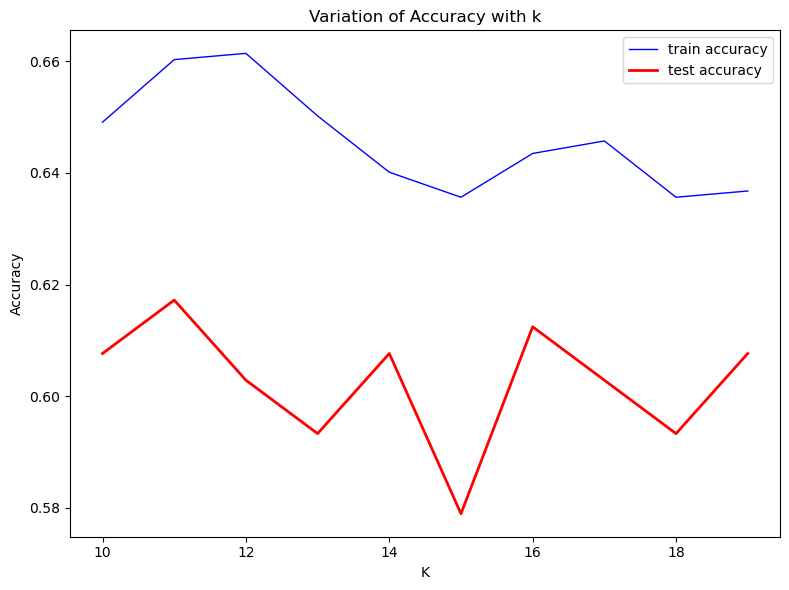

In [32]:
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [33]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,10,0.649103,0.607656
1,11,0.660314,0.617225
2,12,0.661435,0.602871
3,13,0.650224,0.593301
4,14,0.640135,0.607656
5,15,0.635650,0.578947
6,16,0.643498,0.612440
7,17,0.645740,0.602871
8,18,0.635650,0.593301
9,19,0.636771,0.607656


# with k=11 according to upper array, accuracy has increased to 0.62 from 0.58

In [34]:
k = 11

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('Train Accuracy', accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Train Accuracy 0.6603139013452914
Test Accuracy 0.6172248803827751
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66       115
         1.0       0.58      0.55      0.57        94

    accuracy                           0.62       209
   macro avg       0.61      0.61      0.61       209
weighted avg       0.62      0.62      0.62       209



# DECISION TREE

In [172]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [173]:
x= X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y=X_train['alc']
y_test=X_test['alc']
X_test= X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]




In [174]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(x, y)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.579


Max Depth =  1 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  2 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  3 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  4 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  5 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  6 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  7 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  8 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  9 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  10 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  11 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  12 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  13 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  14 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  15 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  18 , Train Acc. =  1.0 , Test Acc. =  1.0
Max Depth =  19 , T

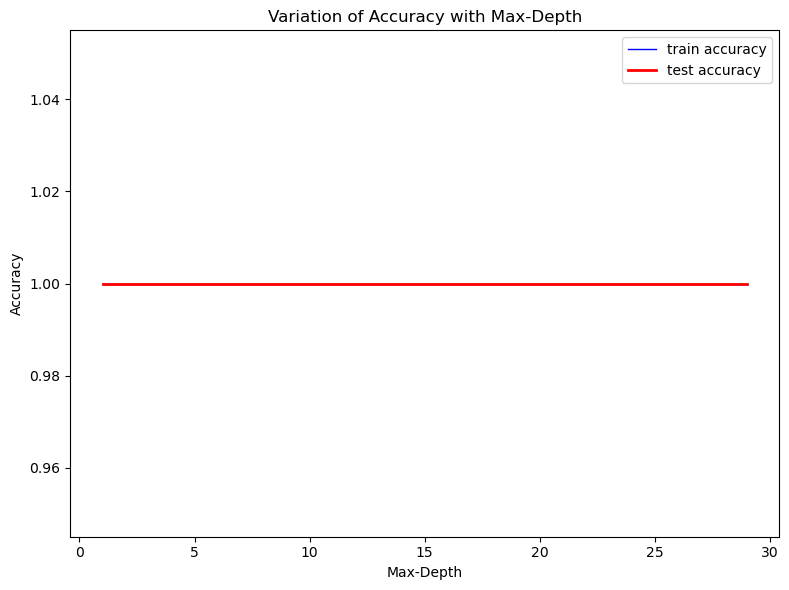

In [185]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();